<a href="https://colab.research.google.com/github/ccasado/saude-em-dados/blob/main/Estudo_sobre_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo sobre a saúde no Brasil
***
### Projeto Data Science aplicada 2 - Módulo 1

## Escopo da análise

O objetivo deste projeto é analisar informações sobre a assistência à saúde da população no Brasil. A mensuração do estado de saúde da população é uma tradição em saúde pública e teve seu início com o registro sistemático de dados de mortalidade e de sobrevivência e foi evoluindo com o avanço no controle de doenças infecciosas e com a melhor compreensão do conceito de saúde e de seus determinantes populacionais.

O DATASUS disponibiliza informações que podem servir para subsidiar análises objetivas da situação sanitária, tomadas de decisão baseadas em evidências e elaboração de programas de ações de saúde.


**Origem dos dados**

* [Tabnet - Tabulador de dados para ambiente internet](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def)

  O programa TabNet foi elaborado com a finalidade de permitir às equipes técnicas do Ministério da Saúde, das Secretarias
Estaduais de Saúde e das Secretarias Municipais de Saúde a realização de tabulações rápidas sobre os arquivos que constituem os
componentes básicos dos Sistemas de Informações do Sistema Único de Saúde, dentro de suas Intranets ou em seus sites Internet.
  

* [Brasil.io](https://brasil.io/)

  Missão e valor: Nossa missão é tornar acessíveis os dados brasileiros de interesse público e temos como valores principais a transparência e colaboração. Dessa maneira, tudo o que produzimos pode ser verificável, pois além de disponibilizarmos os dados em formatos abertos, nosso software é livre e produzimos tudo isso de maneira colaborativa.

**Perguntas a responder**

**1.** Como são distribuídos os recursos financeiros da saúde para os gestores das unidades federativas e qual o critério para essa distribuição?

**2.** Os gastos e internações crescem na mesma proporção ao longo do tempo?

**3.** Como a Covid-19 evolui no Brasil e quais são as consequências desta doença?

**4.** O impacto da Covid-19 é o mesmo para as diferentes unidades federativas do Brasil?

### Módulos e leitura de dados de origem do Tabnet (Datasus) e Brasil.IO

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

dados_gastos = pd.read_csv("https://raw.githubusercontent.com/ccasado/saude-em-dados/main/dados/gasto-anomes_processamento-20182021.csv",
                    encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=';', quotechar='"', engine="python",
                    thousands=".", decimal=",")

dados_internacoes = pd.read_csv("https://raw.githubusercontent.com/ccasado/saude-em-dados/main/dados/internacoes-anomes_processamento-20182021.csv", 
                                encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=';', quotechar='"', engine="python", 
                                thousands=".", decimal=",")

dados_obitos = pd.read_csv("https://raw.githubusercontent.com/ccasado/saude-em-dados/main/dados/obitos-anomes_processamento-20182021.csv", 
                                encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=';', quotechar='"', engine="python", 
                                thousands=".", decimal=",")

dados_covid = pd.read_csv("https://raw.githubusercontent.com/ccasado/saude-em-dados/main/dados/covid19.csv", 
                                encoding="ISO-8859-1", sep=',', quotechar='"', engine="python", 
                                thousands=".", decimal=",")

pd.options.display.float_format= "{:,.2f}".format


### Declaração de funções de apoio a análise dos dados

In [120]:
def graph_bar(df, title, suptitle, strformat, ylabel):
  dados_sort = df[["Unidade da Federação", "Total"]].sort_values(by = "Total", ascending = False)
  ax = dados_sort.plot(x="Unidade da Federação", y = "Total", kind ="bar", figsize=(12,8), legend=None, color="#836fca", edgecolor='black')
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(strformat))
  ax.legend(fontsize=12)
  sns.set_style('darkgrid')
  plt.suptitle(suptitle, size=20, weight='bold')
  plt.title(title, size=14)
  plt.xlabel("UF", size = 12)
  plt.ylabel(ylabel, size = 12)
  plt.xticks(rotation=80)

  return plt.show()

In [140]:
def graph_line(df, title, suptitle, strformat, ylabel, ylim):
  dados_sort = df.sort_values(by = "Total", ascending = False)
  dados_sort.set_index('Unidade da Federação', inplace=True)
  dados_sort = dados_sort[:6]
  dados_sort.drop('Total', axis=1, inplace=True)
  ax = dados_sort.T.plot(kind='line', figsize=(12,8))
  sns.set_style('darkgrid')
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(strformat))
  ax.set_xlabel('Ano/Mês', fontsize=12)
  ax.set_ylabel(ylabel, fontsize=12)
  plt.ylim(0,ylim)
  plt.suptitle(suptitle, size=20, weight='bold' )
  plt.title(title, fontsize=14)
  plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=2, fontsize=12)

  return plt.show()

### **1.** Como são distribuídos os recursos financeiros da saúde para os gestores das unidades federativas e qual o critério para essa distribuição?

O Sistema Único de Saúde, mas conhecido por SUS, foi criado em 1988 pela Constituição Federal Brasileira, que determina que é dever do Estado garantir saúde a toda a população brasileira. O Brasil é o único país com mais de 200 milhões de habitantes que tem um sistema de saúde público e gratuito. O SUS atende todos que procuram suas unidades de saúde ou tem necessidade de atendimento de emergência.
As três esferas de governo – federal, estadual e municipal – são responsáveis por financiar o SUS, gerando receita para custear as despesas com ações e serviços públicos de saúde a partir de contribuições sociais de patrões e empregados, como o INSS. Outra parte vem do pagamento de impostos embutidos no preço dos produtos e serviços (ICMS), IPI (Imposto de Produtos Industrializados), impostos sobre o lucro (Cofins), sobre os automóveis (IPVA) e sobre a moradia (IPTU).

A descentralização da gestão é um dos princípios-chave para o funcionamento do sistema, sendo que as políticas e diretrizes são definidas por comissões de que participam as três esferas de governo, mas os recursos do governo federal são transferidos para que as ações sejam executadas pelos estados e, principalmente, pelos municípios.

De Janeiro de 2018 a Março de 2021 foram gastos um total de R$ 51,989,065,391.41 dos recursos financeiros destinados aos gestores das Unidades Federativas para sustentar os procedimentos nas unidades hospitalares.

In [122]:
gasto_total_ufs = dados_gastos['Total'].sum()
gasto_total_ufs

51989065391.41

São Paulo é o estado que mais recebeu recursos, sendo R$ 11,910,878,406.71 neste mesmo período.

In [123]:
gasto_sp = dados_gastos.loc[dados_gastos['Unidade da Federação'] == '35 São Paulo']['Total']
gasto_sp

19   11,910,878,406.71
Name: Total, dtype: float64

E responde por 22.91% em relação ao gasto total pelas UFs.

In [124]:
(gasto_sp / gasto_total_ufs)*100

19   22.91
Name: Total, dtype: float64

E o Amapá é o estado que menos recebeu recursos, sendo R$ 91,895,642.50 neste mesmo período.

In [125]:
gasto_ap = dados_gastos.loc[dados_gastos['Unidade da Federação'] == '16 Amapá']['Total']
gasto_ap

5   91,895,642.50
Name: Total, dtype: float64

Ou 0.18% em relação ao gasto total pelas UFs.

In [126]:
(gasto_ap / gasto_total_ufs)*100

5   0.18
Name: Total, dtype: float64

Para a distribuição de recursos as Unidades Federativas, existe uma  correlação entre o volume recebido para a saúde por município e a receita municipal, ambos em uma base per capita. Municípios que mais arrecadam com impostos, por terem mais recursos que devem ser investidos em saúde, são os que têm mais incentivos a aderir ou ofertar os programas e serviços que recebem repasses do governo federal através do SUS. A ideia é que o próprio mecanismo de transferências do SUS pode induzir, de forma implícita, os governos locais com maior receita a aderir a mais programas e, portanto, a receber mais transferências.

Alguns estudos (Mendes, Miranda e Cossio) apontam problema no processo de transferências do SUS e a sua incapacidade de distribuir os recursos segundo critérios de necessidade de saúde, como também de premiar bons resultados. 

O gráfico abaixo mostra a distribuição de valores para a saúde por UF entre Janeiro de 2018 e Março de 2021.

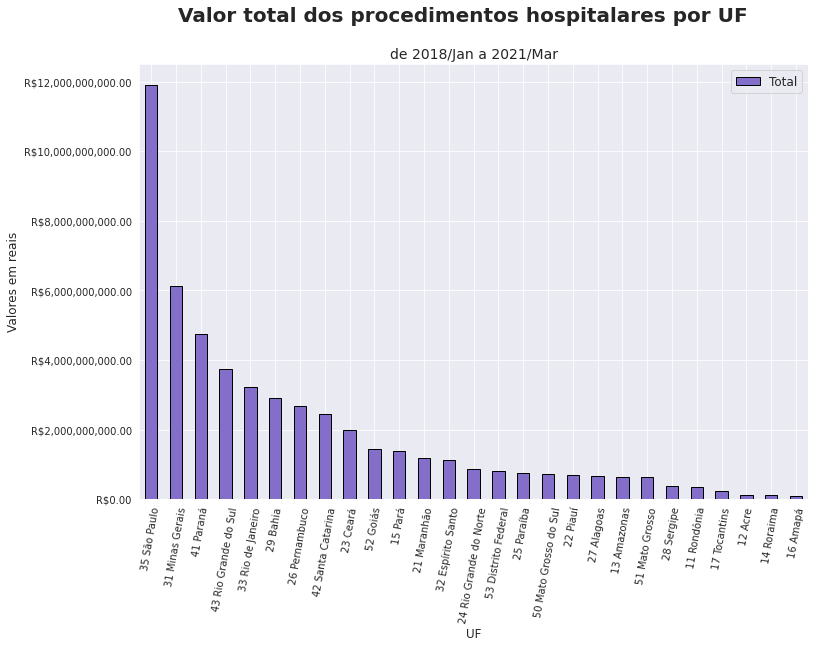

In [127]:
graph_bar(dados_gastos,
          "de 2018/Jan a 2021/Mar",
          "Valor total dos procedimentos hospitalares por UF",
          "R${x:,.2f}",
          "Valores em reais")

E o gráfico abaixo mostra o total de internações hospitalares por UF no mesmo período.

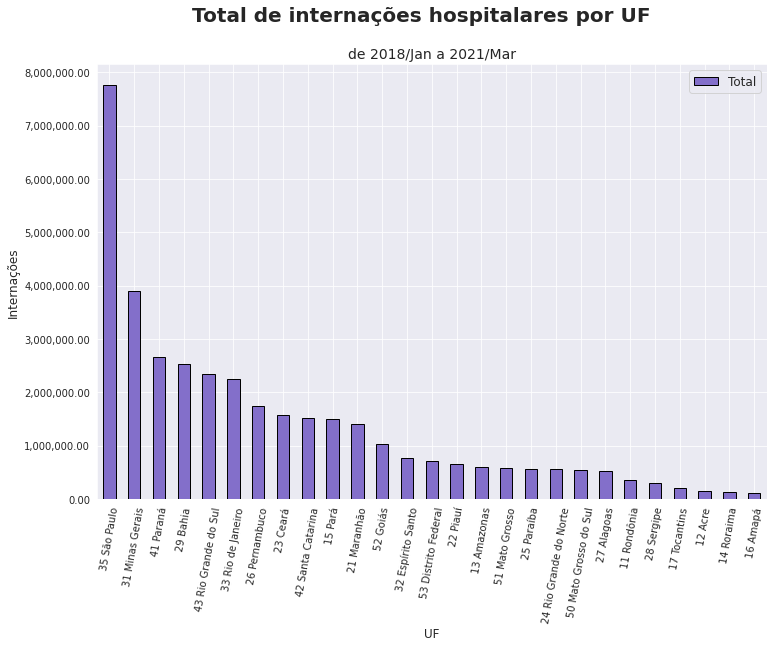

In [128]:
graph_bar(dados_internacoes,
          "de 2018/Jan a 2021/Mar",
          "Total de internações hospitalares por UF",
          "{x:,.2f}",
          "Internações")

Repare que não existe uma correlação direta entre os valores recebidos com o número de internações.  Bahia por exemplo é o sexto estado em gastos e o quarto em internações. O custo por internação na Bahia é de R$ 1,145.81.

In [129]:
gasto_ba = dados_gastos.loc[dados_gastos['Unidade da Federação'] == '29 Bahia']['Total']
internacao_ba = dados_internacoes.loc[dados_internacoes['Unidade da Federação'] == '29 Bahia']['Total']

gasto_ba / internacoes_ba

15   1,145.81
Name: Total, dtype: float64

Já em São Paulo, primeiro em gasto e internações, o custo por internação é de R$ 1,534.01.

In [130]:
internacao_sp = dados_internacoes.loc[dados_internacoes['Unidade da Federação'] == '35 São Paulo']['Total']

gasto_sp / internacao_sp

19   1,534.01
Name: Total, dtype: float64

### **2.** Os gastos e internações crescem na mesma proporção ao longo do tempo?


O gráfico abaixo mostra a evolução dos gastos hospitalares pelas 6 UFs com mais gastos, entre Janeiro de 2018 e Março de 2021. É possível reparar um aumento dos gastos a partir de Março de 2020, sendo mais evidente em São Paulo.

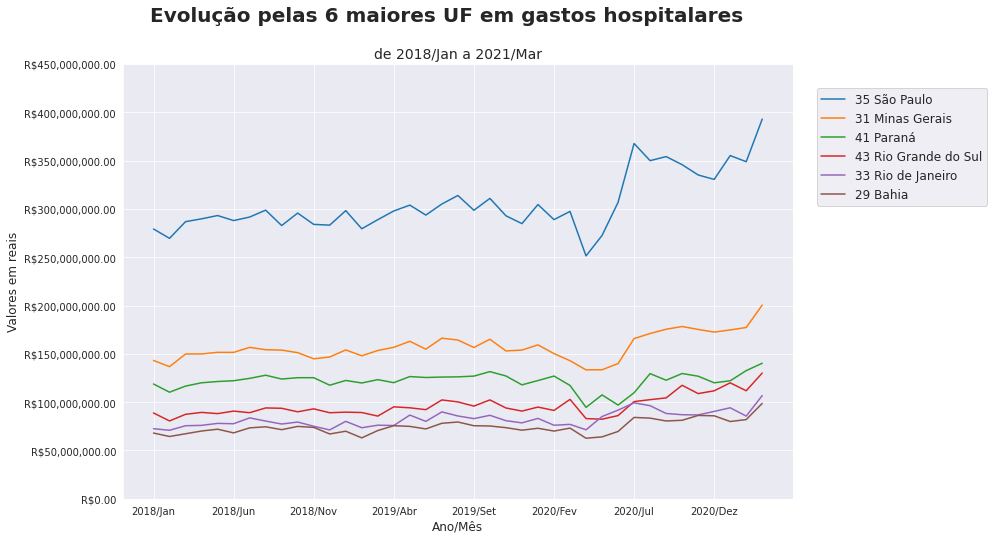

In [141]:
graph_line(dados_gastos,
           "de 2018/Jan a 2021/Mar",
           "Evolução pelas 6 maiores UF em gastos hospitalares",
           "R${x:,.2f}",
           "Valores em reais",
           450000000)

Já a mesma visão gráfica para internações, mostra uma queda do número de internações também em Março de 2020.

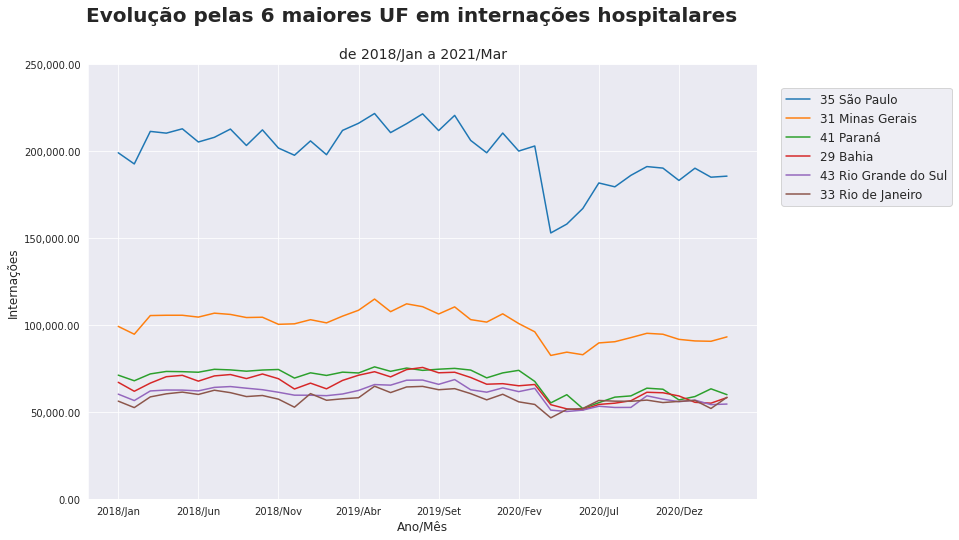

In [142]:
graph_line(dados_internacoes,
           "de 2018/Jan a 2021/Mar",
           "Evolução pelas 6 maiores UF em internações hospitalares",
           "{x:,.2f}",
           "Internações",
           250000)

E no gráfico abaixo um aumento nítido no número de óbitos também em Março de 2020.

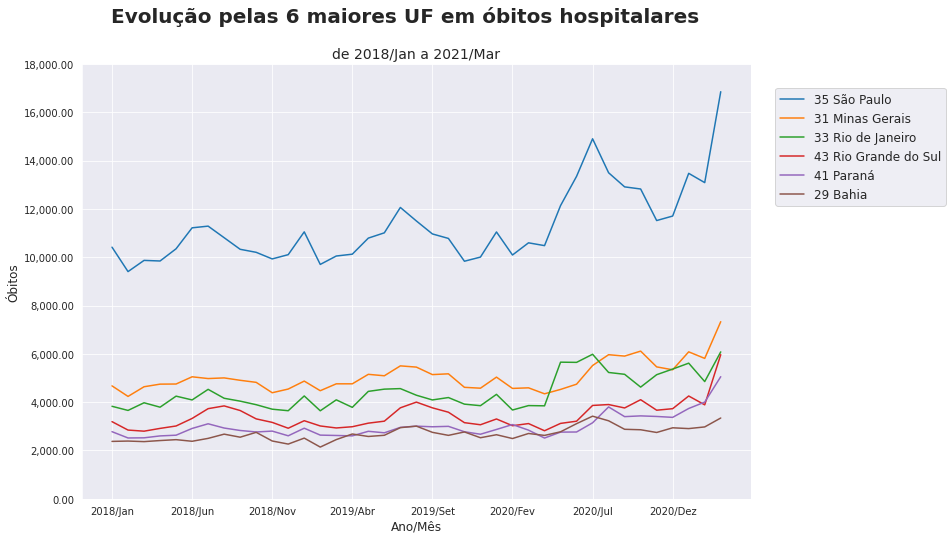

In [143]:
graph_line(dados_obitos,
           "de 2018/Jan a 2021/Mar",
           "Evolução pelas 6 maiores UF em óbitos hospitalares",
           "{x:,.2f}",
           "Óbitos",
           18000)

O aumento dos gastos hospitalares e óbitos a partir de Março/20 pode estar associado ao aumento considerável dos casos de Covid-19 e declaração de transmissão comunitária no país.

O número de internações de pacientes infectados pelo novo coronavírus no estado de São Paulo, em Unidades de Terapia Intensiva, cresceu 1.500% desde 20 de março, passando de 33 para 524 pacientes no último dia 3 de abril.

O número de pessoas que morreram por complicações da covid-19, doença causada pelo novo coronavírus, também cresceu, subindo 180% no mesmo período, no estado de São Paulo.

Fonte: https://agenciabrasil.ebc.com.br/saude/noticia/2020-04/desde-20-de-marco-internacoes-em-sp-por-covid-19-aumentam-1500

Não é possível pelo estudo entender os motivos para a queda do número de internações no gráfico a partir deste período.



### **3.** Como a Covid-19 evolui no Brasil e quais são as consequências desta doença?


A Covid-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global. O SARS-CoV-2 é um betacoronavírus descoberto em amostras de lavado broncoalveolar obtidas de pacientes com pneumonia de causa desconhecida na cidade de Wuhan, província de Hubei, China, em dezembro de 2019. Pertence ao subgênero Sarbecovírus da família Coronaviridae e é o sétimo coronavírus conhecido a infectar seres humanos.

O Brasil identificou a primeira contaminação pelo novo coronavírus no final de fevereiro de 2020, enquanto a Europa já registrava centenas de casos de covid-19. A declaração de transmissão comunitária no país veio em março, mês em que também foi registrada a primeira morte pela doença.



O gráfico abaixo mostra a evolução de casos confirmados da doença no Brasil pela linha do tempo.

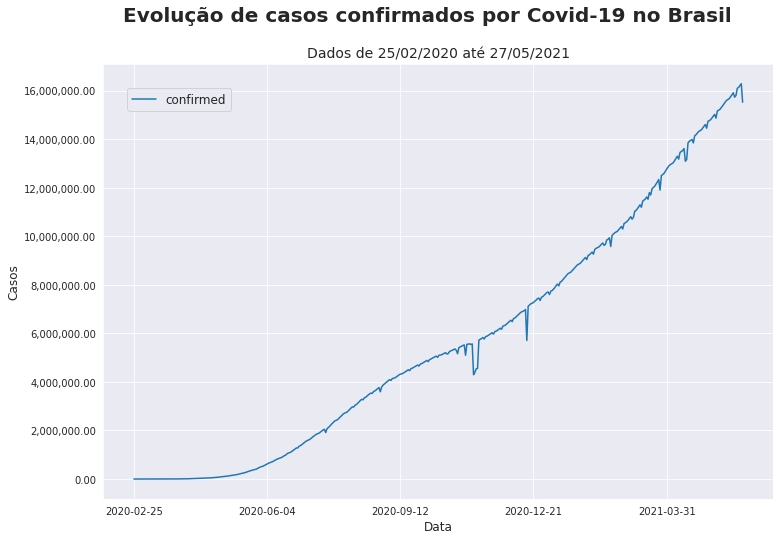

In [144]:
confirmados_tempo = dados_covid[['date', 'confirmed']].groupby(['date']).sum()
ax = confirmados_tempo.plot(kind='line', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
sns.set_style('darkgrid')
plt.suptitle('Evolução de casos confirmados por Covid-19 no Brasil', size=20, weight='bold')
plt.title('Dados de 25/02/2020 até 27/05/2021', size=14)
plt.xlabel('Data', size = 12)
plt.ylabel('Casos', size = 12)
plt.legend(loc='upper left', borderaxespad=2, fontsize=12)

plt.show()

O gráfico abaixo mostra a evolução de mortos pela doença no Brasil na linha do tempo.

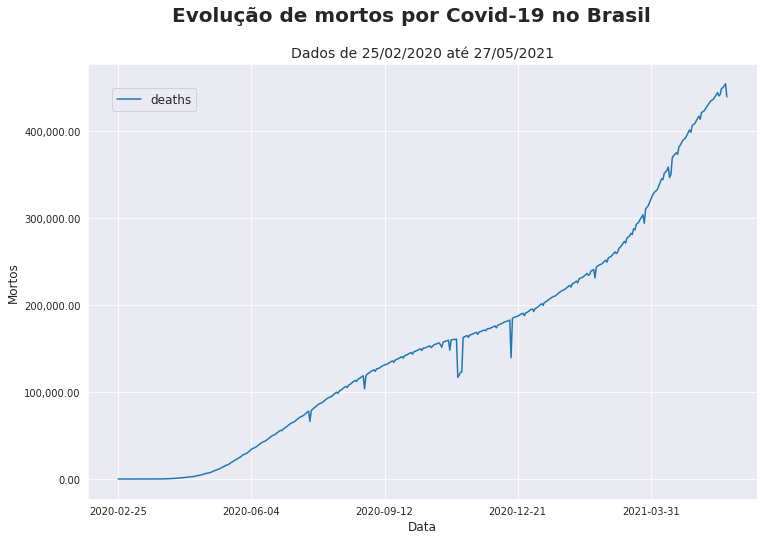

In [145]:
mortos_tempo = dados_covid[['date', 'deaths']].groupby(['date']).sum()
ax = mortos_tempo.plot(kind='line', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
sns.set_style('darkgrid')
plt.suptitle('Evolução de mortos por Covid-19 no Brasil', size=20, weight='bold')
plt.title('Dados de 25/02/2020 até 27/05/2021', size=14)
plt.xlabel('Data', size = 12)
plt.ylabel('Mortos', size = 12)
plt.legend(loc='upper left', borderaxespad=2, fontsize=12)

plt.show()

### **4.** O impacto da Covid-19 é o mesmo para as diferentes unidades federativas do Brasil?

O gráfico abaixo mostra o total de casos confirmados de Covid-19 por UFs até o dia 27 de Maio de 2021.

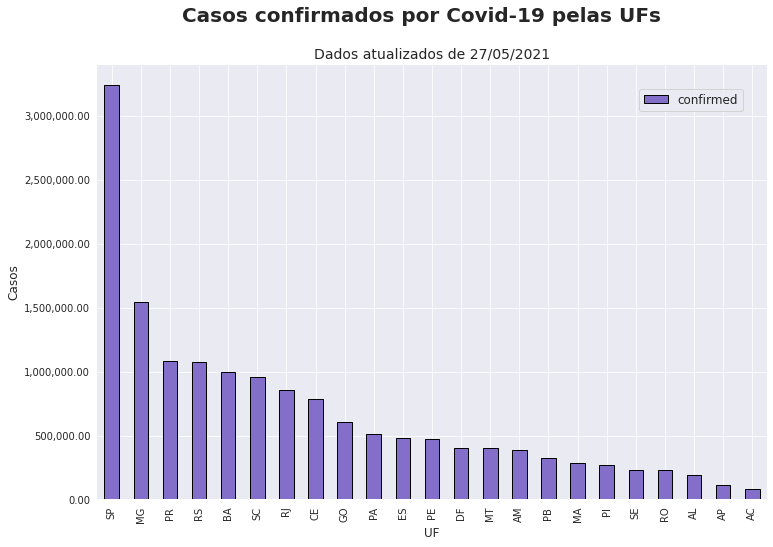

In [146]:
covid_2705 = dados_covid.loc[dados_covid['date'] == '2021-05-27']
covid_2705 = covid_2705.set_index('state')
covid_2705 = pd.DataFrame(covid_2705,columns=["confirmed"])
ax = covid_2705.sort_values(by="confirmed", ascending=False).plot(y=["confirmed"], kind="bar",figsize=(12,8),
                                                                  color="#836fca", edgecolor='black')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
sns.set_style('darkgrid')
plt.suptitle('Casos confirmados por Covid-19 pelas UFs', size=20, weight='bold')
plt.title('Dados atualizados de 27/05/2021', size=14)
sns.despine(bottom = True, left=True)
plt.xlabel("UF", size = 12)
plt.ylabel("Casos", size = 12)
plt.legend(loc='upper right', borderaxespad=2, fontsize=12)

plt.show()

O gráfico abaixo mostra o total de mortos pela Covid-19 por UFs até o dia 27 de Maio de 2021.

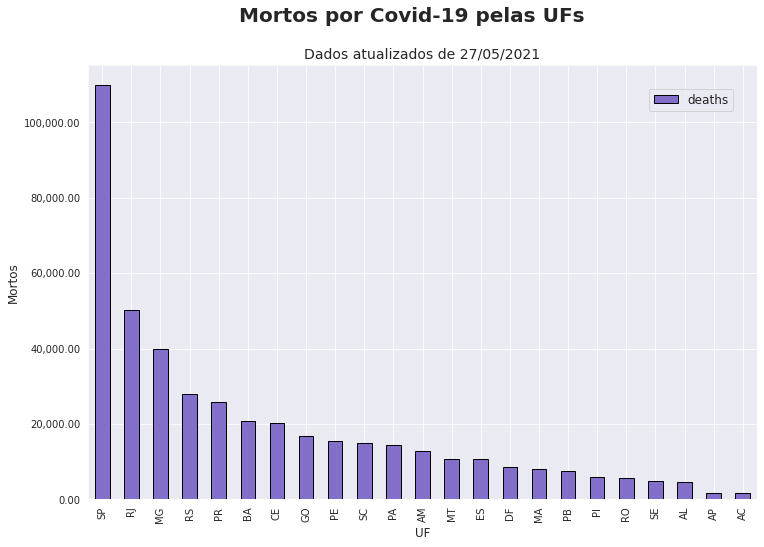

In [147]:
covid_2705 = dados_covid.loc[dados_covid['date'] == '2021-05-27']
covid_2705 = covid_2705.set_index('state')
covid_2705 = pd.DataFrame(covid_2705,columns=["deaths"])
ax = covid_2705.sort_values(by="deaths", ascending=False).plot(y=["deaths"], kind="bar",figsize=(12,8),
                                                               color="#836fca", edgecolor='black')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
sns.set_style('darkgrid')
plt.suptitle('Mortos por Covid-19 pelas UFs', size=20, weight='bold')
plt.title('Dados atualizados de 27/05/2021', size=14)
plt.xlabel("UF", size = 12)
plt.ylabel("Mortos", size = 12)
plt.legend(loc='upper right', borderaxespad=2, fontsize=12)

plt.show()

O Rio de Janeiro é a cidade do Brasil onde se mais morre por Covid-19.  Apesar do gráfico mostrar o maior número de mortos em São Paulo, a capital paulista tem mais de 12 milhões de habitantes, quase o dobro dos 6,7 milhões do Rio, segundo dados do Instituto Brasileiro de Geografia e Estatística (IBGE).

O gráfico abaixo mostra a taxa de mortalidade (mortes / confirmados) pelo estados, com o Rio de Janeiro liderando.

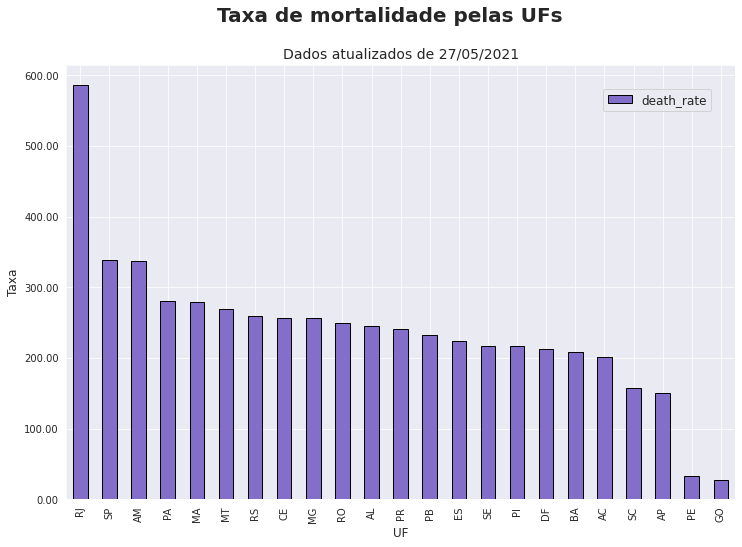

In [172]:
death_rate = pd.DataFrame(dados_covid,columns=["date", "state", "death_rate"])
bla = bla[bla['date'] == '2021-05-27']
ax = bla.sort_values(by="death_rate", ascending=False).plot.bar(x='state', y='death_rate', figsize=(12,8),
                                                                color="#836fca", edgecolor='black')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
sns.set_style('darkgrid')
plt.suptitle('Taxa de mortalidade pelas UFs', size=20, weight='bold')
plt.title('Dados atualizados de 27/05/2021', size=14)
plt.xlabel("UF", size = 12)
plt.ylabel("Taxa", size = 12)
plt.legend(loc='upper right', borderaxespad=2, fontsize=12)

plt.show()

### Referências

[Um estudo sobre a distribuição das transferências para o setor de saúde no Brasil](https://www.scielo.br/j/ee/a/rFMqvgZ384yTcJMZ79XpKgH/?lang=pt)

[Ministério da Saúde altera a distribuição de repasses do SUS](https://www.epsjv.fiocruz.br/noticias/reportagem/ministerio-da-saude-altera-a-distribuicao-de-repasses-do-sus)

[Como funciona o SUS?](https://drauziovarella.uol.com.br/saude-publica/como-funciona-o-sus/)

[Financiamento](https://pensesus.fiocruz.br/financiamento)
